

# Project: Investigate a Dataset (Medical Appointment No Shows analysis!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **intro**: This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

In [120]:
#  importing all the packages that we are going to use
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

 In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.
### General Properties

In [122]:
# Loading our data 
dfm = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [123]:
# showing some rows of data
dfm.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [124]:
# looking for information
dfm.info()
#good we dont have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [125]:
# looking for duplicates
dfm.duplicated().sum()

0

In [126]:
#looking for duplicates in patient id column
dfm['PatientId'].duplicated().sum()

48228

In [127]:
# check if the above duplicates are also dupliacted in the No-show column
dfm.duplicated(['PatientId','No-show']).sum()

38710

In [128]:
# so the above 38710 values are duplicates that must be removed from the data

In [129]:
# some coding for more knowledge 
dfm.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000




### Data Cleaning (removing duplicates, adjusting columns names , droping unnecessary columns and wrong data!)

In [130]:
# renaming columns making it in lower cases and separated with '_':
dfm.rename(columns = lambda x:x.strip().lower().replace('-','_'), inplace = True)

In [131]:
# displaying the new columns names:
dfm.head(0)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [132]:
#removing patient id duplicates
dfm.drop_duplicates(['patientid','no_show'],inplace = True)

In [133]:
#droping unnecessary columns
dfm.drop(['appointmentday', 'scheduledday', 'appointmentid', 'patientid'], axis = 1, inplace = True)

In [135]:
dfm.shape

(71817, 10)

<a id='eda'></a>
## Exploring our  data with coding and visuals





an Overview

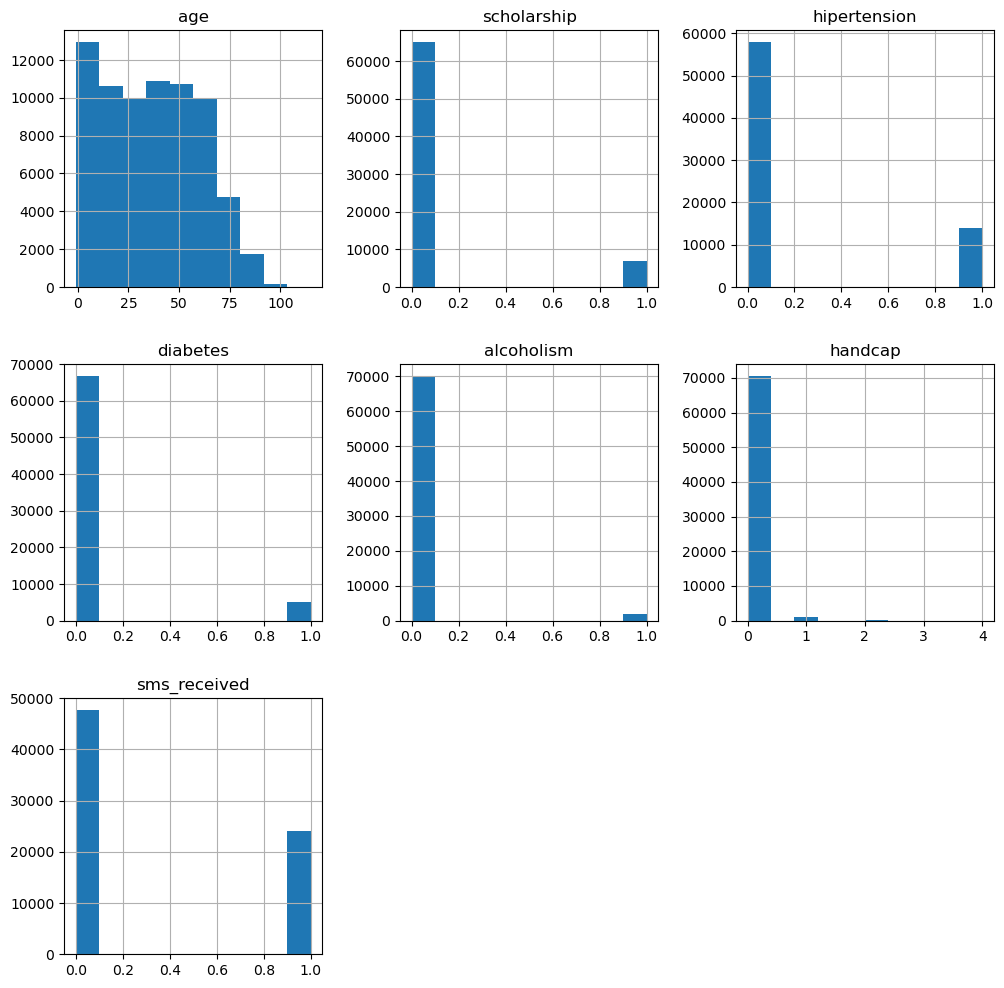

In [64]:
dfm.hist(figsize = (12,12));


In [136]:
dfm.head(0)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [137]:
# now we can split our data into tow groups , group for who came to appointment and other for who didnt show
came=dfm.no_show== 'No'
didnt=dfm.no_show== 'Yes'
didnt.astype(int)
came.astype(int)

0         1
1         1
2         1
3         1
4         1
         ..
110518    1
110520    1
110521    1
110522    1
110524    1
Name: no_show, Length: 71817, dtype: int32

In [138]:
#now we can compare some numbers
dfm[came].mean(),dfm[didnt].mean()

C:\Users\pc\AppData\Local\Temp\ipykernel_11488\2888042053.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfm[came].mean(),dfm[didnt].mean()


(age             37.228460
 scholarship      0.091332
 hipertension     0.202940
 diabetes         0.072866
 alcoholism       0.023599
 handcap          0.020903
 sms_received     0.297226
 dtype: float64,
 age             34.376267
 scholarship      0.108419
 hipertension     0.170922
 diabetes         0.065108
 alcoholism       0.029440
 handcap          0.017777
 sms_received     0.453094
 dtype: float64)

### our Research Question   (  what factors we should keep in mind when predcting future patients attendanc!)

Text(0, 0.5, 'AVG age')

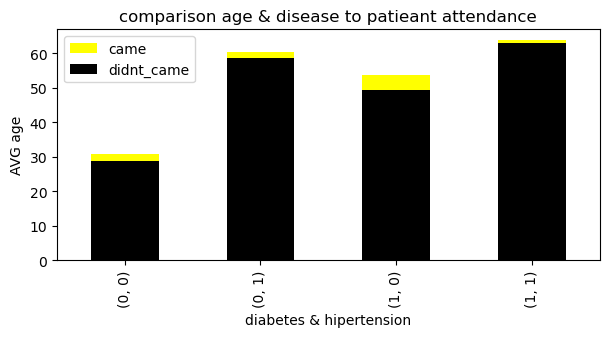

In [139]:
# could age with other disease effect patient attendance?:

plt.figure(figsize=[7,3])
dfm[came].groupby(['diabetes','hipertension']).mean()['age'].plot(kind = 'bar', color= 'yellow', label = 'came')
dfm[didnt].groupby(['diabetes','hipertension']).mean()['age'].plot(kind = 'bar', label = 'didnt_came', color= 'black')
plt.legend();
plt.title('comparison age & disease to patieant attendance')
plt.xlabel('diabetes & hipertension')
plt.ylabel('AVG age')

from the figuring above we can find that thier is no real correlation between patient diseases and atendance 

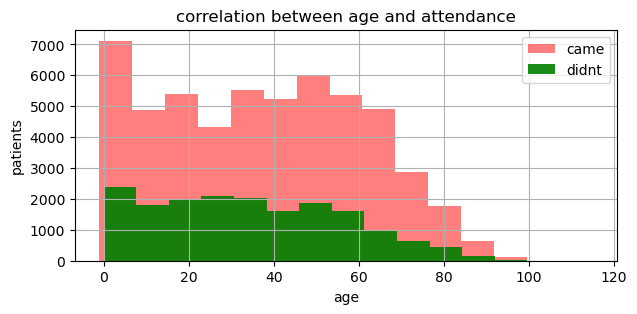

In [143]:
# checking for a correlation between age and attendance:
def show (dfm,column,show,no_show):
    plt.figure(figsize=[7,3]) # setting plot size
    dfm[column][came].hist(bins= 15, label='came', alpha = .5, color= 'r' )
    dfm[column][didnt].hist(bins= 15,label= 'didnt', alpha = .9, color='g' )
    plt.legend();
    plt.title('correlation between age and attendance')
    plt.ylabel('patients')
    plt.xlabel('age')
show(dfm,'age',came,didnt)


frome the figuring above we can see that childrens are the most attended group then comes patieants whom ages are around 48:52 , and the least attending are whome over 70 years.

# checking if we have a correlation between gender and attendance:

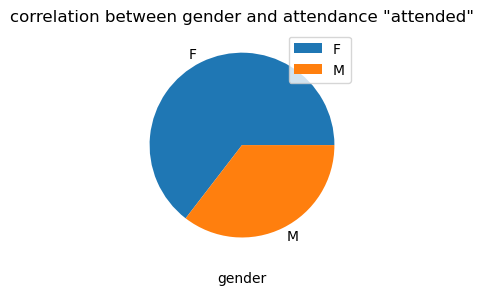

In [145]:
#checking for who show according to gender
def show (dfm,column,show,no_show):
    plt.figure(figsize=[7,3]) # setting plot size
    dfm[column][came].value_counts().plot(kind= 'pie',label= 'came')
    plt.legend();
    plt.title('correlation between gender and attendance "attended"')
    plt.ylabel('')
    plt.xlabel('gender')
show(dfm,'gender',came,didnt)


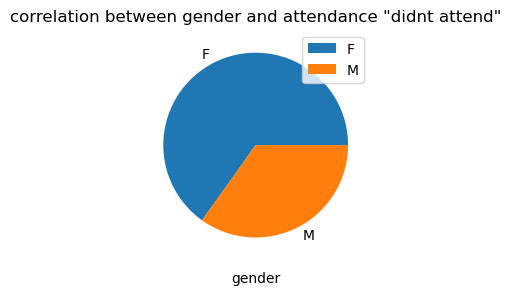

In [146]:
#checking for who didnt show according to gender
def show (dfm,column,show,no_show):
    plt.figure(figsize=[7,3]) # setting plot size
    dfm[column][didnt].value_counts().plot(kind= 'pie',label= 'came')
    plt.legend();
    plt.title('correlation between gender and attendance "didnt attend"')
    plt.ylabel('')
    plt.xlabel('gender')
show(dfm,'gender',came,didnt)


as a conclusion from the tow figurings above , gender has no straight effect on attendance

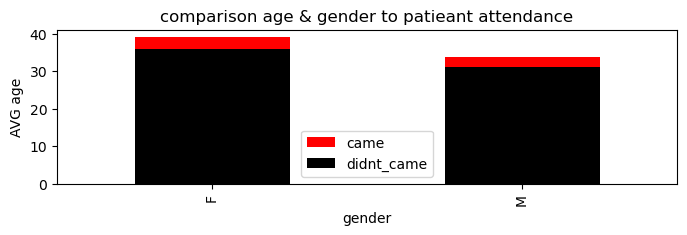

In [147]:
# could age with gender effect patieant attendance?:

plt.figure(figsize=[8,2])
dfm[came].groupby(['gender']).mean()['age'].plot(kind = 'bar', color= 'r', label = 'came')
dfm[didnt].groupby(['gender']).mean()['age'].plot(kind = 'bar', label = 'didnt_came', color= 'black')
plt.legend();
plt.title('comparison age & gender to patieant attendance')
plt.xlabel('gender')
plt.ylabel('AVG age');

no real correlation 

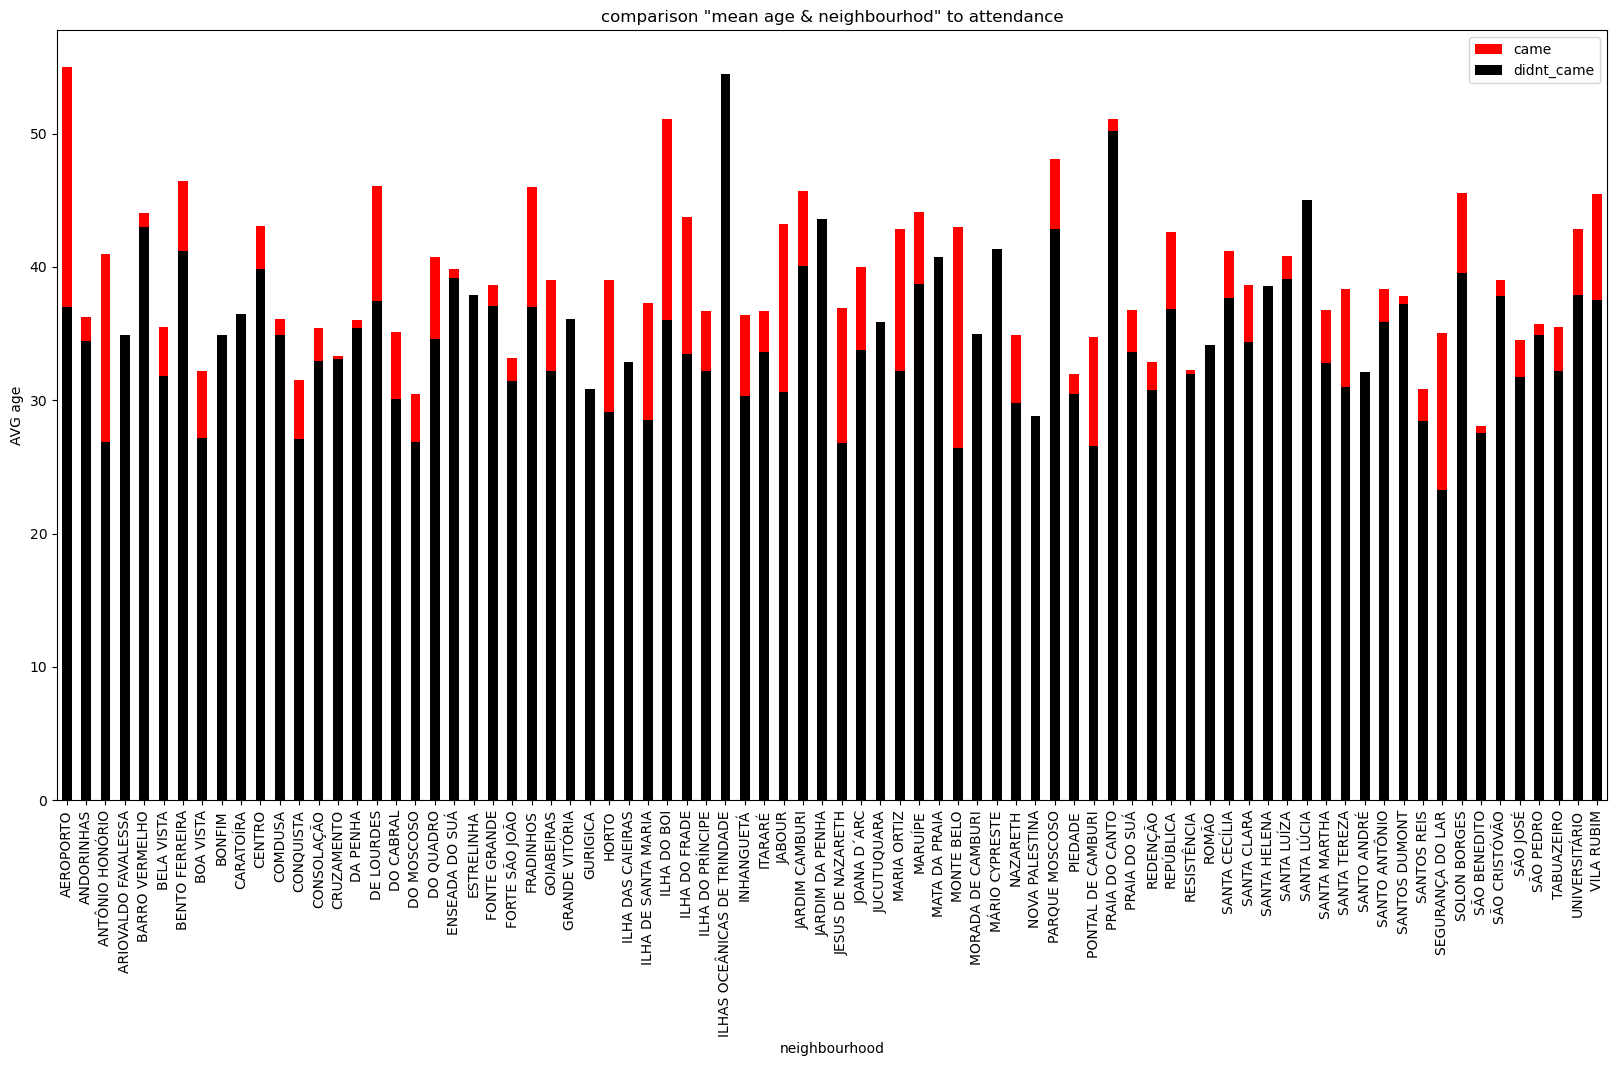

In [148]:
# looking if ther is a correlation between mean age in differant nighbourhoods and patieants attendance 
plt.figure(figsize=[20,10])
dfm[came].groupby(['neighbourhood']).age.mean().plot(kind = 'bar', color= 'r', label = 'came')
dfm[didnt].groupby(['neighbourhood']).age.mean().plot(kind = 'bar', label = 'didnt_came', color= 'black')
plt.legend();
plt.title('comparison "mean age & neighbourhod" to attendance')
plt.xlabel('neighbourhood')
plt.ylabel('AVG age');

patieants attendance differs from neighbourhod to anotheer according to age average in these places

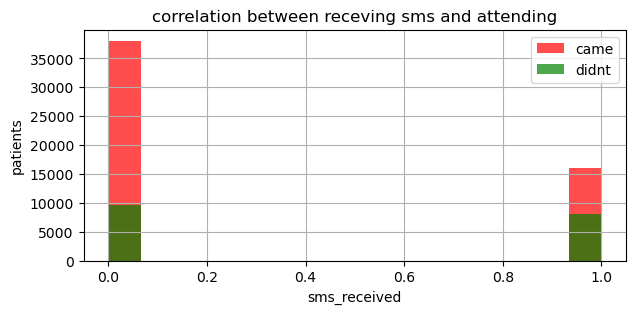

In [75]:
# looking for a correlation between receaving sms and atttending
def show (dfm,column,show,no_show):
    plt.figure(figsize=[7,3]) # setting plot size
    dfm[column][came].hist(bins= 15, label='came', alpha = .7, color= 'r' )
    dfm[column][didnt].hist(bins= 15,label= 'didnt', alpha = .7, color='g' )
    plt.legend();
    plt.title('correlation between receving sms and attending')
    plt.ylabel('patients')
    plt.xlabel('sms_received')
show(dfm,'sms_received',came,didnt)

here we can find a strong correlation between receving sms and attending the appointments, as we can see from the figuring above about 50% from patients who receaved an sms didnt show , while more han 75% of patieants who didnt receave an sms attended. 

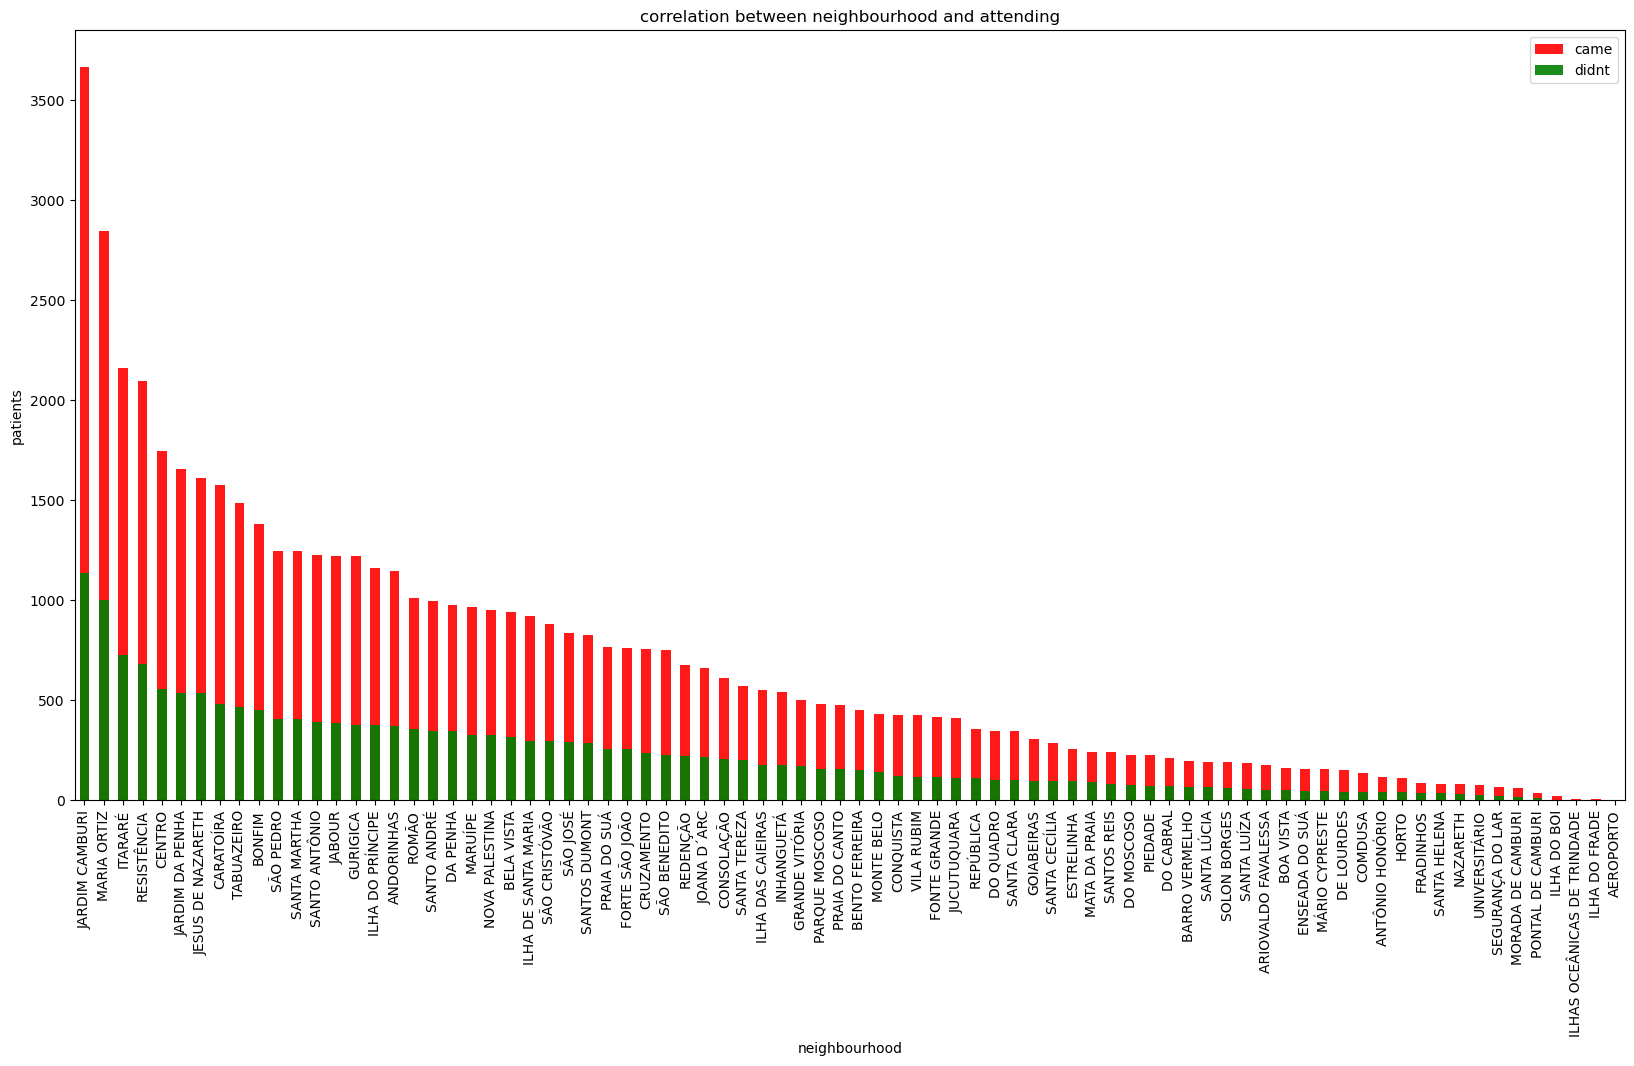

In [149]:
# looking for a correlation between neighbourhood and atttending
def show (dfm,column,show,no_show):
    plt.figure(figsize=[20,10]) # setting plot size
    dfm[column][came].value_counts().plot(kind = 'bar', label='came', alpha = .9, color= 'r' )
    dfm[column][didnt].value_counts().plot(kind= 'bar',label= 'didnt', alpha = .9, color='g' )
    plt.legend();
    plt.title('correlation between neighbourhood and attending')
    plt.ylabel('patients')
    plt.xlabel('neighbourhood')
show(dfm,'neighbourhood',came,didnt)

as exepected, neighbourhood has a clear correlation with attendance , we can see the top four neighbourhoods in patieant numbers, has a perccentile close to 75% of attending , so ther is a strong correlation between neighbourhood and attendance 

lets take our analysis a step further 

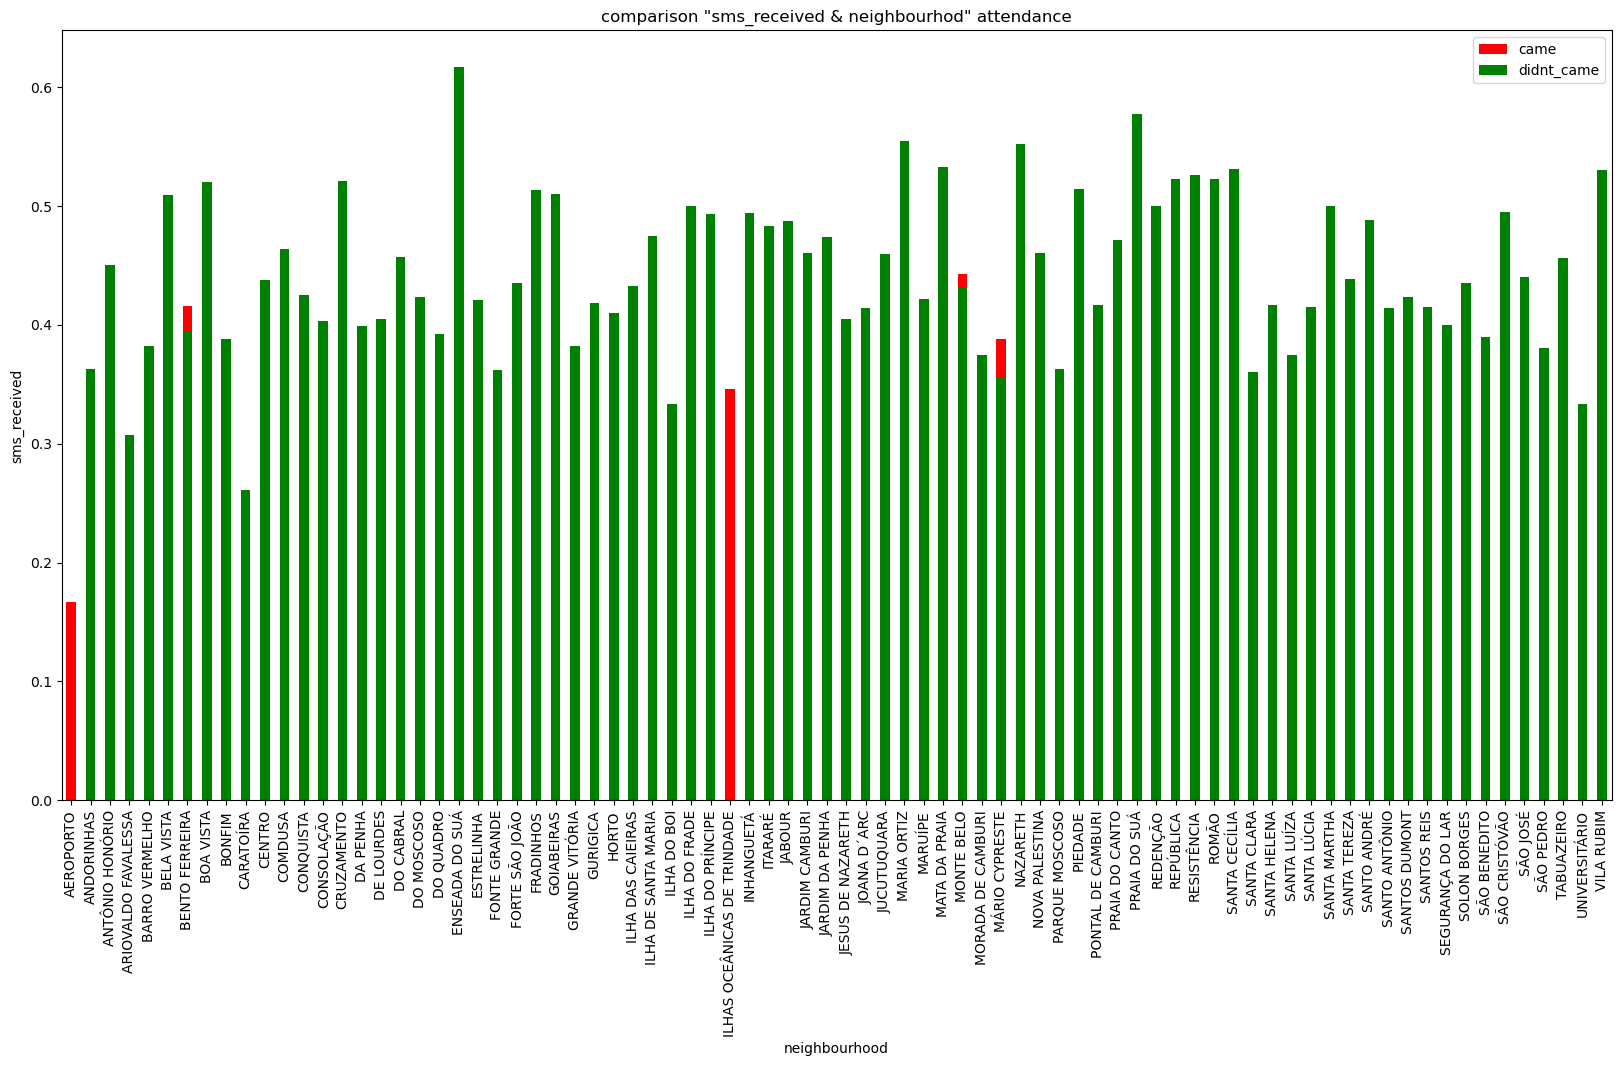

In [150]:
# looking if ther is a correlation between sms receaved in differant nighbourhoods and patieants attendance 
plt.figure(figsize=[20,10])
dfm[came].groupby(['neighbourhood']).sms_received.mean().plot(kind = 'bar', color= 'r', label = 'came')
dfm[didnt].groupby(['neighbourhood']).sms_received.mean().plot(kind = 'bar', label = 'didnt_came', color= 'g')
plt.legend();
plt.title('comparison "sms_received & neighbourhod" attendance')
plt.xlabel('neighbourhood')
plt.ylabel('sms_received');

its clear that sms has no response, ecxept in 5 nighbourhoods , ther is a strong correlation.

<a id='conclusions'></a>
## Conclusions


1 - differnt diseases in all ages has no correlation  with attendance.

2 - there is a correlation between attendance and age , childrens are the most attended group, then comes patieants whom ages are around 48:52 , and the least attending are whome over 70 years.

3 - gender has no correlation with attendance .

4 - gender with differnt ages also has no correlation with attendance.

5 - there is a very strong correlation between receving sms and attending , about 50% from patients who receaved an sms didnt show , while more han 75% of patieants who didnt receave an sms attended,wich means we should revisit our sms campagin

6 - attendace from a specific neighbourhood affected by receaving sms and age


my refrances :
https://www.kaggle.com/code/ahmedterry/stroke-prediction-eda-classification-models
https://stackoverflow.com/
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html